<a href="https://colab.research.google.com/github/safi-alt/CE888/blob/main/Safi_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import math



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
 x_arr = np.random.choice(x, (n_bootstraps, sample_size))
 data_mean = np.mean(x_arr)
 boot_mean = np.mean(x_arr, axis = 1)
 upper = np.percentile(boot_mean,97.5)
 lower = np.percentile(boot_mean,2.5)
 
 return data_mean, lower, upper

	# <---INSERT YOUR CODE HERE--->
	
	# arr = np.array([x])
	# rand_sample = np.random.choice(arr, sample_size, replace=False)
	# data_mean = np.mean(rand_sample)
	# s = np.std(arr) # std of vector
	# lower = np.percentile(,92.5)
	# upper = np.percentile(,2.5)

	#dt_arr = []
	
	#data_mean = np.mean(x_arr)
	#for d in x_arr:
	#	res = np.mean(d)
#		dt_arr.append(round(res,2))
#	print("mean array is ", dt_arr)#
#	a = np.array(dt_arr)
#	a.sort()
	
 
	# print(data_mean, lower, upper)
	
	

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

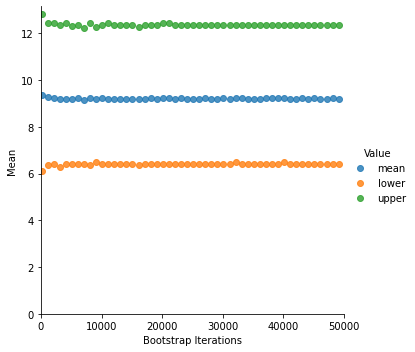

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
 x_arr = np.random.choice(sample, (n_bootstraps, sample_size))
 data_mean = np.mean(x_arr)
 boot_mean = np.mean(x_arr, axis = 1)
 upper = np.percentile(boot_mean,(100+ci)/2)
 lower = np.percentile(boot_mean,(100-ci)/2)
 
 return data_mean, lower, upper
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

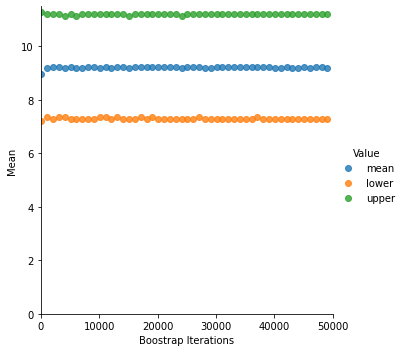

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


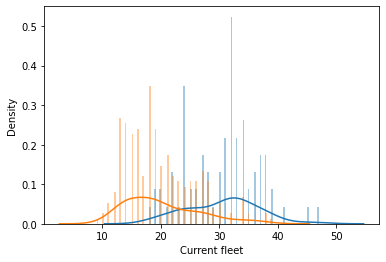

In [7]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
fl1 = df.values.T[0]
fl2 = df.values.T[1]

fl2_clean = df['New Fleet'].dropna()
fl1_clean = df['Current fleet']
# current = df.values.T[0]
# current
# old = df.values.T[1]
# old

#sns.distplot(fl2['New Fleet'].notnull(),hist=True,bins=100)
sns.distplot(fl2_clean,hist=True,bins=100)
sns.distplot(fl1_clean,hist=True,bins=100)
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [8]:
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
fl1 = df.values.T[0]
fl2 = df.values.T[1]

fl2_clean = df['New Fleet'].dropna()
fl1_clean = df['Current fleet']
print("The mean is", np.mean(fl1_clean))
print("The mean is", np.mean(fl2_clean))

# res = bootstrap_mean(x, sample_size, n_bootstraps)


The mean is 20.14457831325301
The mean is 30.481012658227847


In [9]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    global observed_difference_mean
    greater_diff_permutations = []
    concat = np.concatenate((sample1, sample2), axis=None)
    # print(concat)
    for i in range(1, n_permutations + 1):
      perm = np.random.permutation(concat)
      # print(perm)
      pold = perm[ : int(len(perm/2))]
      pnew = perm[int(len(perm)/2) : ]
      mean_of_pold = np.mean(pold)
      mean_of_pnew = np.mean(pnew)
      permuted_diff_mean = mean_of_pnew - mean_of_pold
      if (permuted_diff_mean > observed_difference_mean):
        greater_diff_permutations.append(permuted_diff_mean)

    #print(greater_diff_permutations)
    pvalue = len(greater_diff_permutations)/n_permutations
    
    return pvalue

In [18]:
vehicles = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
current_v_data = vehicles[vehicles.columns[0]].values
new = vehicles.dropna(subset=['New Fleet'])
new_v_data = new.values.T[1]


confidence_interval_c_stats = 80
confidence_interval_n_stats = 60
c_stats = bootstrap_mean_ci(current_v_data, len(current_v_data), 10000, confidence_interval_c_stats)
n_stats = bootstrap_mean_ci(new_v_data, len(new_v_data), 10000, confidence_interval_n_stats)
print("The current fleet has a",confidence_interval_c_stats, "% confidence interval mean of", c_stats[0],"with lower limit", c_stats[1], "and upper limit", c_stats[2])
print("The new fleet has a", confidence_interval_n_stats, "% confidence interval mean of", n_stats[0],"with lower limit", n_stats[1], "and upper limit", n_stats[2])
observed_difference_mean = n_stats[0] - c_stats[0]
p_value = permut_test(current_v_data, new_v_data, 30000)
print("The p-value is:", p_value)
if( p_value < 0.01 ):
  print("The New fleet is better since the the p-value is < 5% significance level")
else:
  print("The Old fleet is better since the p-value is > 5% significance level")

The current fleet has a 80 % confidence interval mean of 20.146402409638554 with lower limit 19.626506024096386 and upper limit 20.670682730923694
The new fleet has a 60 % confidence interval mean of 30.48094683544304 with lower limit 29.89873417721519 and upper limit 31.050632911392405
The p-value is: 0.0
The New fleet is better since the the p-value is < 5% significance level


In [21]:
ans = bootstrap_mean_ci(data, len(data), 10000, 95)
ans

(9.215792857142857, 6.428571428571429, 12.357142857142858)

In [12]:
def bootstrap_std_dev_ci(sample, sample_size, n_bootstraps, ci):
	std_dev_array = []
	for i in range(1,n_bootstraps + 1):
		std_dev_array.append(np.std(np.random.choice(sample,sample_size)))
	sorted_array = np.sort(std_dev_array)
	ci_breaker = (100-ci)/2
	lower = np.percentile(sorted_array, ci_breaker)
	upper = np.percentile(sorted_array, ci + ci_breaker)
	data_std_dev = np.mean(std_dev_array)
	return data_std_dev, lower, upper

In [23]:
std = bootstrap_std_dev_ci(data, len(data), 10000, 90)
std

(5.321928928559819, 3.0338229402279002, 7.078279509621425)

In [14]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [15]:
len(dem_share_PA)

67

In [16]:
len(dem_share_OH)

88

In [24]:
confidence_interval_ohio = 90
confidence_interval_Pennsylvania = 90
ohio = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000 , confidence_interval_ohio)
Pennsylvania = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000 , confidence_interval_Pennsylvania)
print("Ohio has a",confidence_interval_ohio, "% confidence interval mean of", ohio[0],"with lower limit", ohio[1], "and upper limit", ohio[2])
print("Pennsylvania has a", confidence_interval_Pennsylvania, "% confidence interval mean of", Pennsylvania[0],"with lower limit", Pennsylvania[1], "and upper limit", Pennsylvania[2])
observed_difference_mean = Pennsylvania[0] - ohio[0]
p_value = permut_test(dem_share_OH, dem_share_PA, 20000)
print("The p-value is:", p_value)
if( p_value < 0.1 ):
  print("The Pennsylvania voters are likely better since the the p-value is < 5% significance level")
else:
  print("The Ohio voters are likely better since the p-value is > 5% significance level")

Ohio has a 90 % confidence interval mean of 44.307258413636355 with lower limit 42.54760227272726 and upper limit 46.03251704545455
Pennsylvania has a 90 % confidence interval mean of 45.48637807761197 with lower limit 43.574895522388054 and upper limit 47.461574626865676
The p-value is: 0.06585
The Pennsylvania voters are likely better since the the p-value is < 5% significance level
